## Algorithms

Programming is not only about making the computer do work for us, it about optimising the amount of work the computer needs to do. There are multiple types of work we can consider but here we will consider three major bottlenecks in our codes.

1. Computational Complexity : how many instructions are executed?
2. Memory needs : how much memory is needed?
3. I/O : how many reads and writes or network requests do I need to make ? 

An algorithm is a procedure for solving a problem. It describes a sequence of operations that when performed will result into the solution of the problem. Often we are interested in understanding the performance of an algorithm in terms of the three bottlenecks listed above (as well as others). In other to understand this algorithm we need to develope some tools to understand how the algorithms behave as a function of the problem size.

### Big O

In other to quantify the complexity of a particular algorithm, we can quantify how the algorithm grows with respect to the size of the problem. For the purposes of this notebook we will only consider problems that are one dimensional, so we an quantify the algorithm with respect to a single number denoted as $N$. Remember that a  problem itself does not have a complexity, rather it is the algorithm solution which has complexity. For example, let's consider the problem of summing all the numbers between 1 and $N$(inclusive). One way to solve this might be to take the sum of all the numbers.
$$ \mathcal{O}(N) $$

In [43]:
import numpy as np

def sum_all(N):
    sum_ = 0
    times = []
    ts = time.time()
    for n in range(N + 1):
        sum_ += n
        times.append(time.time() - ts)
    return sum_

sum_all(10000)

50005000

In [36]:
#dir(np)

Because we need to perform $N$ operation, the complexity is $ \mathcal{O}(N) $. Note that we only care about the dominant function of $N$ in the expansion so for our purposes $O(N) \approx O(N + 1) \approx O(2N)$

However if we have a rethink about how number sums, we can invoke a summation rule often attributed to Gauss which says that 
$$ \sum_{n=1}^{N} n = \frac {N(N+1)}{2} $$

In [1]:
def sum_form(N):
    return N * (N + 1) // 2

In [4]:
sum_form(5)

15

Because the function sum_form does not depend on the size of $N$ unlike function sum_all, its complexity is of the order $ \mathcal {O}(1)$. As it has only one command which makes it linear.

Let's just check that both functions give the same answer

In [5]:
for N in range(100):
    assert sum_all(N) == sum_form(N)

Now let's plot the time it takes to computes these functions as a function of N

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

In [7]:
ts = time.time()
ts

1657630793.6725368

In [8]:
(time.time() - ts) * 1000

134.8733901977539

In [9]:
container = []
for n in range(10, 100000, 5000):
    container.append(n)
    
len(container)

20

In [10]:
sum_form(20)

210

In [6]:
for _ in range(5):
    print(5)

5
5
5
5
5


In [49]:
# for _ in range(15):
#     ts = time.time()
#         #func(N)
#     print(sum_all(5))

# for N in range(5, 20, 4 ):
#     for _ in range(15):
#         print(sum_all(5))

In [48]:
#rough work
def compute(n_avgs, func, N):
    times = []
    sums = []
    for _ in range(n_avgs): # number of iteration for the inner function
        ts = time.time()    # it first take the first number fo N and iterate _ times
        func(N)             # then returns the time it started for each outward iteration
        times.append(time.time() - ts)
    return sum(times)/float(len(times)) * 1000

values = []
for N in range(10, 100, 20):
    values.append(compute(500, sum_all, N))
    
values

[0.005989551544189453,
 0.01997995376586914,
 0.01798248291015625,
 0.0319676399230957,
 0.047959327697753906]

In [50]:
def compute(n_avgs, func, N):
    times = []
    for _ in range(n_avgs):
        ts = time.time()
        func(N)
        times.append(time.time() - ts)
    return sum(times)/float(len(times)) *1000 #milliseconds

n_avgs = 100
time_sum = []
time_gauss = []
N_range = range(10, 100000, 5000)
for N in N_range:
    time_sum.append(compute(n_avgs, sum_all, N))
    time_gauss.append(compute(n_avgs, sum_form, N))

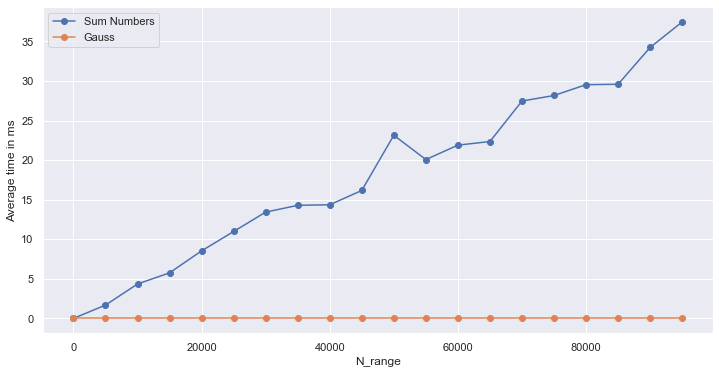

In [51]:
plt.figure(figsize=[12, 6])
plt.plot(N_range, time_sum, 'o-', label= "Sum Numbers")
plt.plot(N_range, time_gauss, 'o-', label= "Gauss")
plt.xlabel("N_range")
plt.ylabel("Average time in ms")
plt.legend()

In [15]:
import random
random.choice([0, 5, 9])

5

In [16]:
#dir(random)

## Computational Complexity

Let's solve a version of common problem you might find as data scientist, how should I store my data? Let's tak a very simple case where our data is just a list of numbers and we need to store these in a list. Is there anyway to optimize the storage?

Let's consider the tradeoffs for various things we might want to do in the list.

### Finding an element

If we want to find an element in a list and we know nothing about list, then we need to check every element in the list to see if that elemet is there. Let's write a function to do this

In [16]:
def find_ele(list_, ele):
    for i in list_:
        if i == ele:
            return True
    return False

In other to test these, lets use the random module to generate a list of random numbers between 0 and 10*N where N is the length of the list we want.

In [17]:
import random
import numpy as np

list_ = [random.randint(0, 10*N) for N in np.arange(10)]
print(list_)
find_ele(list_, 8)

[0, 1, 11, 20, 8, 12, 35, 56, 71, 66]


True

In [18]:
def random_list(N, sort=False):
    list_ = [random.randint(0, 10*N) for _ in np.arange(N)]
    return sorted(list_) if sort else list_

random_list(5, True)    

[7, 9, 28, 34, 34]

Let's time the function

Packing positional argument

Sometimes during the function call, we may use an arbitrary number of arguments. Since we don't know the number of arguments to be passed during the function call, we can use packing to pack all the arguments in a tuple.

In [52]:
def mul(*args):
    result = 1
    for i in args:
        result *= i
    print(result)
    
mul(2,3,4)

24


Unpacking keyword arguments

when the arguments are in the form of a dictionary, we can unpack them during the function call using the ** operator

In [21]:
def mul2(a, b, c):
    print(a * b * c)
    
d = {'a':4, 'b':5, 'c':7}
mul2(**d)

140


In [80]:
import time

def time_func(func, *avgs):
    ts = time.time()
    func(*avgs)
    return time.time() - ts

def compute_with_list(n_avgs, N, sort, *funcs):
    ans = []
    for _ in range(n_avgs):
        list_r = random_list(N, sort)
        n_to_find = random.randint(0, 10*N)
        ans.append([time_func(func, list_r, n_to_find) for func in funcs])
        #now find avgs
        return np.array(ans).mean(axis=0)*1000
    
n_avgs = 40
N_range = range(10, 100000, 10000)
time_list = np.array([compute_with_list(n_avgs, N, False, find_ele) for N in N_range])

2.198481559753418

In [70]:
#np.mean()

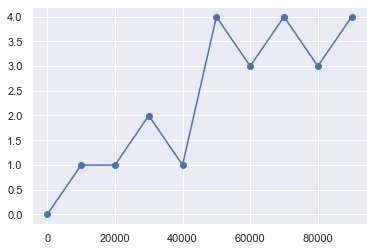

In [81]:
plt.plot(N_range, time_list, "o-")

Let us take a different approach where we know this list is sorted. Note that sorting itself is Nlog(N) complexity, so although we will be able to perform optimized on a sorted list, it not ingeneral faster to sort and then find the element. However, if we know we will be searching often, we can build up the list as a sorted structure and for now we can assume we have already done so.

The only basic optimization we can perform is to only check until we have seen a number greater than what we are looking for. Since we know the list is sorted we are guaranteed to not find the number in the rest of the list.

#### Why is the time complexity of (merge) sort $ \mathcal{O}N(logN)\ $ from Quora by Dun Kumari
Merge Sort separates the array in half and takes linear time to merge the two halves. 

In [82]:
def find_element_sorted(list_, ele):
    for i in list_:
        if i == ele:
            return ele
        elif i > ele:
            return False
    return False

n_avgs = 40
N_range = range(10, 100000, 10000)
time_list = np.array([compute_with_list(n_avgs, N, True, find_ele, find_element_sorted) for N in N_range])

In [83]:
time_list

array([[0.        , 0.        ],
       [0.        , 1.00326538],
       [1.00064278, 0.99897385],
       [0.99802017, 1.99770927],
       [1.99842453, 4.9932003 ],
       [3.99422646, 0.99849701],
       [3.99327278, 3.99541855],
       [5.9928894 , 9.99140739],
       [6.99138641, 7.98797607],
       [8.98122787, 8.99171829]])

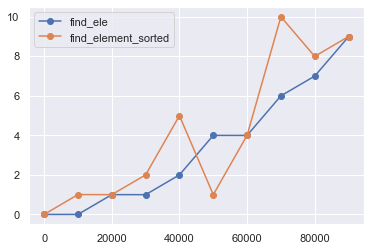

In [84]:
plt.plot(N_range, time_list[:,0], "o-", label="find_ele")
plt.plot(N_range, time_list[:,1], "o-", label="find_element_sorted")
plt.legend()

This does better on the average, but it still have $ \mathcal {0}(N) $ runtime. Such optimization are useful but we can do better. Lets implement what is sometimes known as Binary search. This is a recursive algorithm that allows the list to be divided roughly in half on each recursive step. The will yield logarithmic assymptotic run time. Let's first illustrate the algorithm by walking through an example where l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] and we want to check if 2 is contained in the list. 

First we check the midpoint of the list, which is 6. We know that 2 does not equal 6, but since the list is sorted, we can immediately rull out the part of the list containing numbers greater than 6. Thus we have already rulled out half the elements of the list

Now we can ask the question is 2 contained in the list [1, 2, 3, 4, 5]. First we check the midpoint element of the list which is 3. We know that 3 is not 2, but again since 3 > 2, we can eliminate half the list.

Now we can check if 2 is contained in the list [1, 2]. We will take the midpoint of this list as the first element(since it has index 1 = len(list)/2 and this is equal to 2. Thus 2 is in the original list.

We can see we have performed this search in only three steps and up to an extra step, this did not depend on where 2 was in the list, only that it was sorted. Since we are removing half the list each time, we expect that the number of N will be roughly $ \mathcal {O}(logN) $ where the logarithm is understood to be in base two.

#### Note : from mediun by Humam Abo Alraja 
- When an algorithm has $ \mathcal{O}(logN)\ $ running time, it means that as the input size grows, the number of operations grows very slowly.
- Even though $ \mathcal{O}(N)\ $ is pretty good for an algorithm,$ \mathcal{O}(logN)\ $ is gonna be way better as the size of your input increases.

In [85]:
def find_ele_binary(l_, ele):
    # check if the list is empty
    if len(l_) < 1:
        return False
    mid_point = len(l_) // 2    # get the midpoint
    if l_[mid_point] == ele:    # check if the midpoint element equals the element that is required
        return True  
    elif l_[mid_point] > ele:   # check if the midpoint element is greater than the element required
        return find_ele_binary(l_[:mid_point], ele)  
    else:
        return find_ele_binary(l_[mid_point+1:], ele)

In [86]:
n_avgs = 50
N_range = np.arange(1000, 70000, 8000)
time_list = np.array([compute_with_list(n_avgs, N, True, find_element_sorted, find_ele_binary) for N in N_range])

In [87]:
time_list

array([[0.        , 0.        ],
       [0.99802017, 0.        ],
       [1.99794769, 0.        ],
       [0.9996891 , 0.        ],
       [0.        , 0.        ],
       [4.99558449, 0.        ],
       [1.99794769, 1.00135803],
       [5.99241257, 0.99992752],
       [1.99747086, 0.9996891 ]])

In [ ]:
np.polyfit()

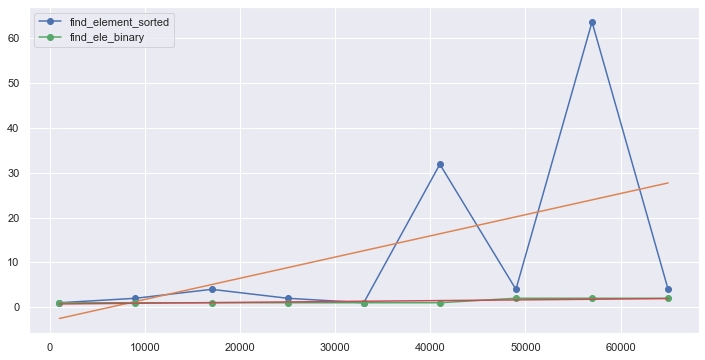

In [88]:
plt.figure(figsize=[12, 6])
for i, func in enumerate(['find_element_sorted', 'find_ele_binary']):
    plt.plot(N_range, 2**time_list[:, i],'o-', label=func)
    
    p = np.polyfit(N_range, 2**time_list[:, i], 1)
    #print(p[0])
    plt.plot(N_range, N_range * p[0] + p[1])
    
plt.legend()

In [82]:
5 * 3 + 4

19

In [ ]:
lim = [1, 4, 5, 8, 5, 9, 2]
lim[4:]

### Memoization

Often we can get performance increase just by not recomputing things we have already computed. Let's look again at our Fibonacci recursive sequence.

In [94]:
def fibonacci_recursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

In [95]:
fibonacci_recursive(6)

8

In [124]:
fibonacci_recursive(5)

5

- fibonacci_recursive(4) + fibonacci_recursive(3) 
- fibonacci_recursive(3) + fibonacci_recursive(2) + fibonacci_recursive(2) + fibonacci_recursive(1)
- fibonacci_recursive(2) + fibonacci_recursive(1) + fibonacci_recursive(1) + fibonacci_recursive(0)
- fibonacci_recursive(1) + fibonacci_recursive(0) 
- fibonacci_recursive(1) + fibonacci_recursive(0) 

Let's make a slightly different version which keeps track of our many times we call the function on each element.

In [113]:
from collections import defaultdict
def fibonacci_count(n, d):
    d[n] += 1
    if n == 0:
        return 0, d
    if n == 1:
        return 1, d
    else:
        n1, _ = fibonacci_count(n - 1, d) 
        n2, _ = fibonacci_count(n - 2, d)
        return n1 + n2, d

Let's see this action for N = 5

In [105]:
N = 5
ans, d = fibonacci_count(N, defaultdict(int))
for i in range(N):
    print(i, d[i])

0 3
1 5
2 3
3 2
4 1


In [121]:
# mine own method
res, count = fibonacci_count(5, defaultdict(int))
for key, val in count.items():
    print(key, val)


5 1
4 1
3 2
2 3
1 5
0 3


In [123]:
count

defaultdict(int, {5: 1, 4: 1, 3: 2, 2: 3, 1: 5, 0: 3})

Now let's look for N = 25

In [139]:
N = 25
ans, d = fibonacci_count(N, defaultdict(int))
for i in range(N):
    print(ans,i, d[i])

75025 0 46368
75025 1 75025
75025 2 46368
75025 3 28657
75025 4 17711
75025 5 10946
75025 6 6765
75025 7 4181
75025 8 2584
75025 9 1597
75025 10 987
75025 11 610
75025 12 377
75025 13 233
75025 14 144
75025 15 89
75025 16 55
75025 17 34
75025 18 21
75025 19 13
75025 20 8
75025 21 5
75025 22 3
75025 23 2
75025 24 1


Notice we are calling some of these functons with the same argument thousands of time. If we store the answer to the problem instead of recomputing.

In [171]:
dic = {0:0,1:1}
for i in range(5):
    if i in dic:
        print(dic[i])

0
1


In [176]:
def fibonacci_mem(n, d):
    if n in d:
        return d[n]
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        ans = fibonacci_mem(n-1, d) + fibonacci_mem(n-2, d)
    d[n] = ans  # populate the dictionary
    return ans

In [184]:
# testing with this
def fibonacci_mem2(n, m):
    if n in m:
        return m[n]
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        ans = fibonacci_mem2(n-1, m) + fibonacci_mem2(n-2, m)
        m[n] = ans
    return ans
        

In [185]:
fibonacci_mem2(25,{})

75025

In [188]:
%%timeit
fibonacci_mem(33, {})

24.1 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [189]:
%%timeit
fibonacci_mem(33, {0:0, 1:1})

24.3 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [187]:
%%timeit
fibonacci_recursive(33)

3.87 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [191]:
assert fibonacci_mem(33, {}) == fibonacci_recursive(33)

Our memoised solution does better, it is several orders of magnitude faster than the recursive.

However it come with a cost, although we save computation, we must use more memory to store the previous result. Often there is a trade between the two.

### Exercise

1. Write the factorial function f(n) = n! as a recusive function
2. Would memoization make this function faster?
3. Now what if we need to calculate the factorial often(perhaps we were calculating probabilities of different selections), could we use memoization in this case?

1.

n! = n(n-1)(n-2)...1

In [304]:
def fact(n):
    if n == 0:
        return 1
    elif n == 1:
        return 1
    else:
        return n * fact(n - 1)

In [251]:
fact(10)

3628800

In [250]:
import math
math.factorial(10)

3628800

using memoization on factorial

In [258]:
def fact_mem(n, d):
    if n in d:
        return d[n]
    if n < 1 or n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        ans = fact_mem(n - 1, d)
        d[n] = ans
    return d[n] * n
    

In [259]:
fact_mem(10, {})

3628800

In [293]:
%%timeit 
fact(10)

5.07 µs ± 865 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [264]:
%%timeit
fact_mem(10, {0:0, 1:1})

8 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [290]:
def fact_mem2(n):
    ans = 1
    if n < 1 or n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        for i in range(1, n + 1):
            ans *= i
    return ans

In [291]:
fact_mem2(10)

3628800

In [294]:
%%timeit
fact_mem2(10)

2.58 µs ± 447 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [296]:
list(range(5))

[0, 1, 2, 3, 4]

In [303]:
fact(0), math.factorial(0)

(0, 1)

In [305]:
for n in range(1000):
    assert fact(n) == math.factorial(n)

### Memory

As seen before memoization has a tradeoff in terms of memory. Let's try to describe that here for the case of Fibonacci sequence. We have to keep track of a single element number
for all number less than N, the number we want to compute. Thus the memory we need grows with problem size as $  \mathcal{0}(N) $

We can analyse our algorithms in terms of memory in a similar way. Again remember, it is the algorithm(and the implementation) which has memory complexity not the problem itself.

For our first problem, we will again look at summing the numbers between 0 and N, and we will take two different approaches.

For the first, we will build a list of these elements and then sum.

In [306]:
def sum_list(n):
    numbers = list(range(n))
    return sum(numbers)

In [307]:
def sum_iter(n):
    number = 0
    sum_ = 0
    while number < n:
        sum_ += number
        number += 1
    return sum_

In [308]:
sum_list(100), sum_iter(100)

(4950, 4950)

In [309]:
%%timeit 
sum_list(1000)

36 µs ± 4.23 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [310]:
%%timeit
sum_iter(1000)

203 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Choose data structure wisely

As we may have known in the sorting section,the type of data structure we use is often ties to the choice of algorithm. For example, if we don`t already have sorted data, we probably don't want to use binaey search becaus ew e wolud need to sort the data and then will negate any search improvement (sorting is worse than $ \mathcal{O}(N) $)

This can be mitigated by choosing our original structure wisely, expecially when we get to build it from the raw data. For example when building a list, inserting data in a sorted manner can be done in $ \mathcal{O}log(N) $ time (with almost the same as binary search).

Other data structures lend themselves to other algorithmic purposes. For example, a heap(implemented in python with the heapq library) implemnts a tree like structure which is useful for order statistics, such as keeping track of the largest of smallest N items in a collection. 

### Exercise

1. Explain why sorting and then using binary search is slower than just searching
2. Implement insertion on a list using the same principle  binary search

number 2

In [9]:
lis = [1,8, 10, 6, 12]
lis.sort()
lis

[1, 6, 8, 10, 12]

In [9]:
def binary_search(list_, ele):
    ans = []
    mid_point = len(list_) // 2
    if list_ == []:
        ans.append(ele)
        return ans
    elif list_[mid_point] == ele:
        list_.append(ele)
        return sorted(list_)
    else:
        list_.append(ele)
    return sorted(list_)

In [10]:
binary_search([1,4,5,10,11], 20)

[1, 4, 5, 10, 11, 20]

In [19]:

def binary_search(list_, ele):
    mid_point = len(list_) // 2
    if list_ == []:
        return list_.append(ele)
    elif ele == list_[mid_point]:
        return list_.append(ele).sort()
    else:
        list_.append(ele)
    return sorted(list_)
    
def compute_with_list(N, sort=True):
    ans = []
    list_r = random_list(N, sort)
    ele_to_add = random.randint(0, 10*N)
    ans.append(binary_search(list_r, ele_to_add))
    return ans
    

compute_with_list(5)   

[[1, 10, 22, 39, 40, 47]]

In [1]:
def find_ele_binary(l_, ele):
    # check if the list is empty
    if len(l_) < 1:
        return False
    mid_point = len(l_) // 2    # get the midpoint
    if l_[mid_point] == ele:    # check if the midpoint element equals the element that is required
        return True  
    elif l_[mid_point] > ele:   # check if the midpoint element is greater than the element required
        return find_ele_binary(l_[:mid_point], ele)  
    else:
        return find_ele_binary(l_[mid_point+1:], ele)

In [11]:
#Solutiom from geeksforgeeks
def binary_search2(arr, val, start, end):
    if start == end:
        if arr[start] > val:
            return start
        else:
            return start + 1
        
        mid = (start + end) // 2
        if arr[mid] < val:
            return binary_search2(arr, val, mid + 1, end)
        elif arr[mid] > val:
            return binary_search2(arr, val, start, mid - 1)
        else:
            mid

def insertion_sort(arr):
    for i in range(1, len(arr)):
        val = arr[i]
        j = binary_search2(arr, val, 0, i-1)
        arr = arr[:j] + [val] + arr[j:i] + arr[i+1:]
        
    return arr

In [20]:
#insertion_sort([1,4,5,10,11])

In [4]:
insertion_sort([1,4,5,10,11])

[1, 11, 10, 5, 4]

In [24]:
def count_dict(list_):
    count = {}
    for i in list_:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1      
            
    return count
        
count_dict([1,5, 4, 5, 10,4, 11, 1, 4])

{1: 2, 5: 2, 4: 3, 10: 1, 11: 1}

In [49]:
from collections import defaultdict

def count_default(x):
    count = defaultdict(int)
    for i in x:
        count[i] += 1
    return count

list(count_default([1, 5, 4, 5, 10, 4, 11, 1, 4]).items())

[(1, 2), (5, 2), (4, 3), (10, 1), (11, 1)]

#### Checking for duplicate

In [46]:
arr = [5, 4, 8, 9, 10, 3, 4, 5, 7, 10]

for i in range(len(arr)):
    for j in range(i+1, len(arr)):
        if arr[i] == arr[j]:
            print(str(arr[i]) + " has a duplicate")
            break
    #print("No duplicate found")


5 has a duplicate
4 has a duplicate
10 has a duplicate


#### Array Exercise from Code Basics

1. Let us say your expense for every month are listed below,
	1. January -  2200
 	2. February - 2350
    3. March - 2600
    4. April - 2130
    5. May - 2190

Create a list to store these monthly expenses and using that find out,

    1. In Feb, how many dollars you spent extra compare to January?
    2. Find out your total expense in first quarter (first three months) of the year.
    3. Find out if you spent exactly 2000 dollars in any month
    4. June month just finished and your expense is 1980 dollar. Add this item to our monthly expense list
    5. You returned an item that you bought in a month of April and
    got a refund of 200$. Make a correction to your monthly expense list
    based on this


In [71]:
monthly_expenses = {"January": 2200, "February": 2350, "March": 2600, "April":2130, "May": 2190, "August": 2000}

In [89]:
list_monthly_expenses = list(monthly_expenses.items())

In [90]:
list_monthly_expenses[1][1] - list_monthly_expenses[0][1]

150

In [74]:
first_quarter_sum = list_monthly_expenses[1][1] + list_monthly_expenses[0][1] + list_monthly_expenses[2][1]
first_quarter_sum

7150

In [81]:
list_monthly_expenses

[('January', 2200),
 ('February', 2350),
 ('March', 2600),
 ('April', 2130),
 ('May', 2190),
 ('August', 2000)]

In [85]:
for i in list_monthly_expenses:
    if i[1] != 2000:
        continue
    else:
        print(i[0])

August


In [87]:
monthly_expenses.update({'June': 1980})

In [88]:
monthly_expenses

{'January': 2200,
 'February': 2350,
 'March': 2600,
 'April': 2130,
 'May': 2190,
 'August': 2000,
 'June': 1980}

In [91]:
monthly_expenses.update({'April': 1830})

In [92]:
monthly_expenses

{'January': 2200,
 'February': 2350,
 'March': 2600,
 'April': 1830,
 'May': 2190,
 'August': 2000,
 'June': 1980}

In [95]:
monthly_expenses['April'] = 1840
monthly_expenses

{'January': 2200,
 'February': 2350,
 'March': 2600,
 'April': 1840,
 'May': 2190,
 'August': 2000,
 'June': 1980}